# Exploratory Data Analysis and Model Building - Bank Marketing Campaign

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create data drame to read data set
file_path = r"C:\Users\Vijay\Desktop\AU_Assignment\Question1\bank-additional\bank-additional\bank-additional-full.csv"
df = pd.read_csv(file_path, sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# check the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# find number of rows and column
df.shape

(41188, 21)

In [6]:
# describe df numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


## Input variables:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)    
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  ## Output variable (desired target):
  
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Exploratory Data Analysis

- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features
- Find Pair Plot
- Check the Data set is balanced or not based on target values in classification

**1. Find Unwanted Columns**

**Take-away**:
- these is no unwanted column present in given dataset to remove

**2. Find Missing Values**

In [8]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


**Take-away**:
- No missing value found

**3. Find Features with One Value**

In [9]:
for column in df.columns:
    print(column,df[column].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


**Take-away**:
- No feature with only one value

**4. Explore the Categorical Features**

In [10]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [11]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 3
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is day_of_week and number of categories are 5
The feature is poutcome and number of categories are 3
The feature is y and number of categories are 2


**Take-away**:
- there are 9 categorical features
- feature job and month has highest number of categorical values

**5. Find Categorical Feature Distribution**

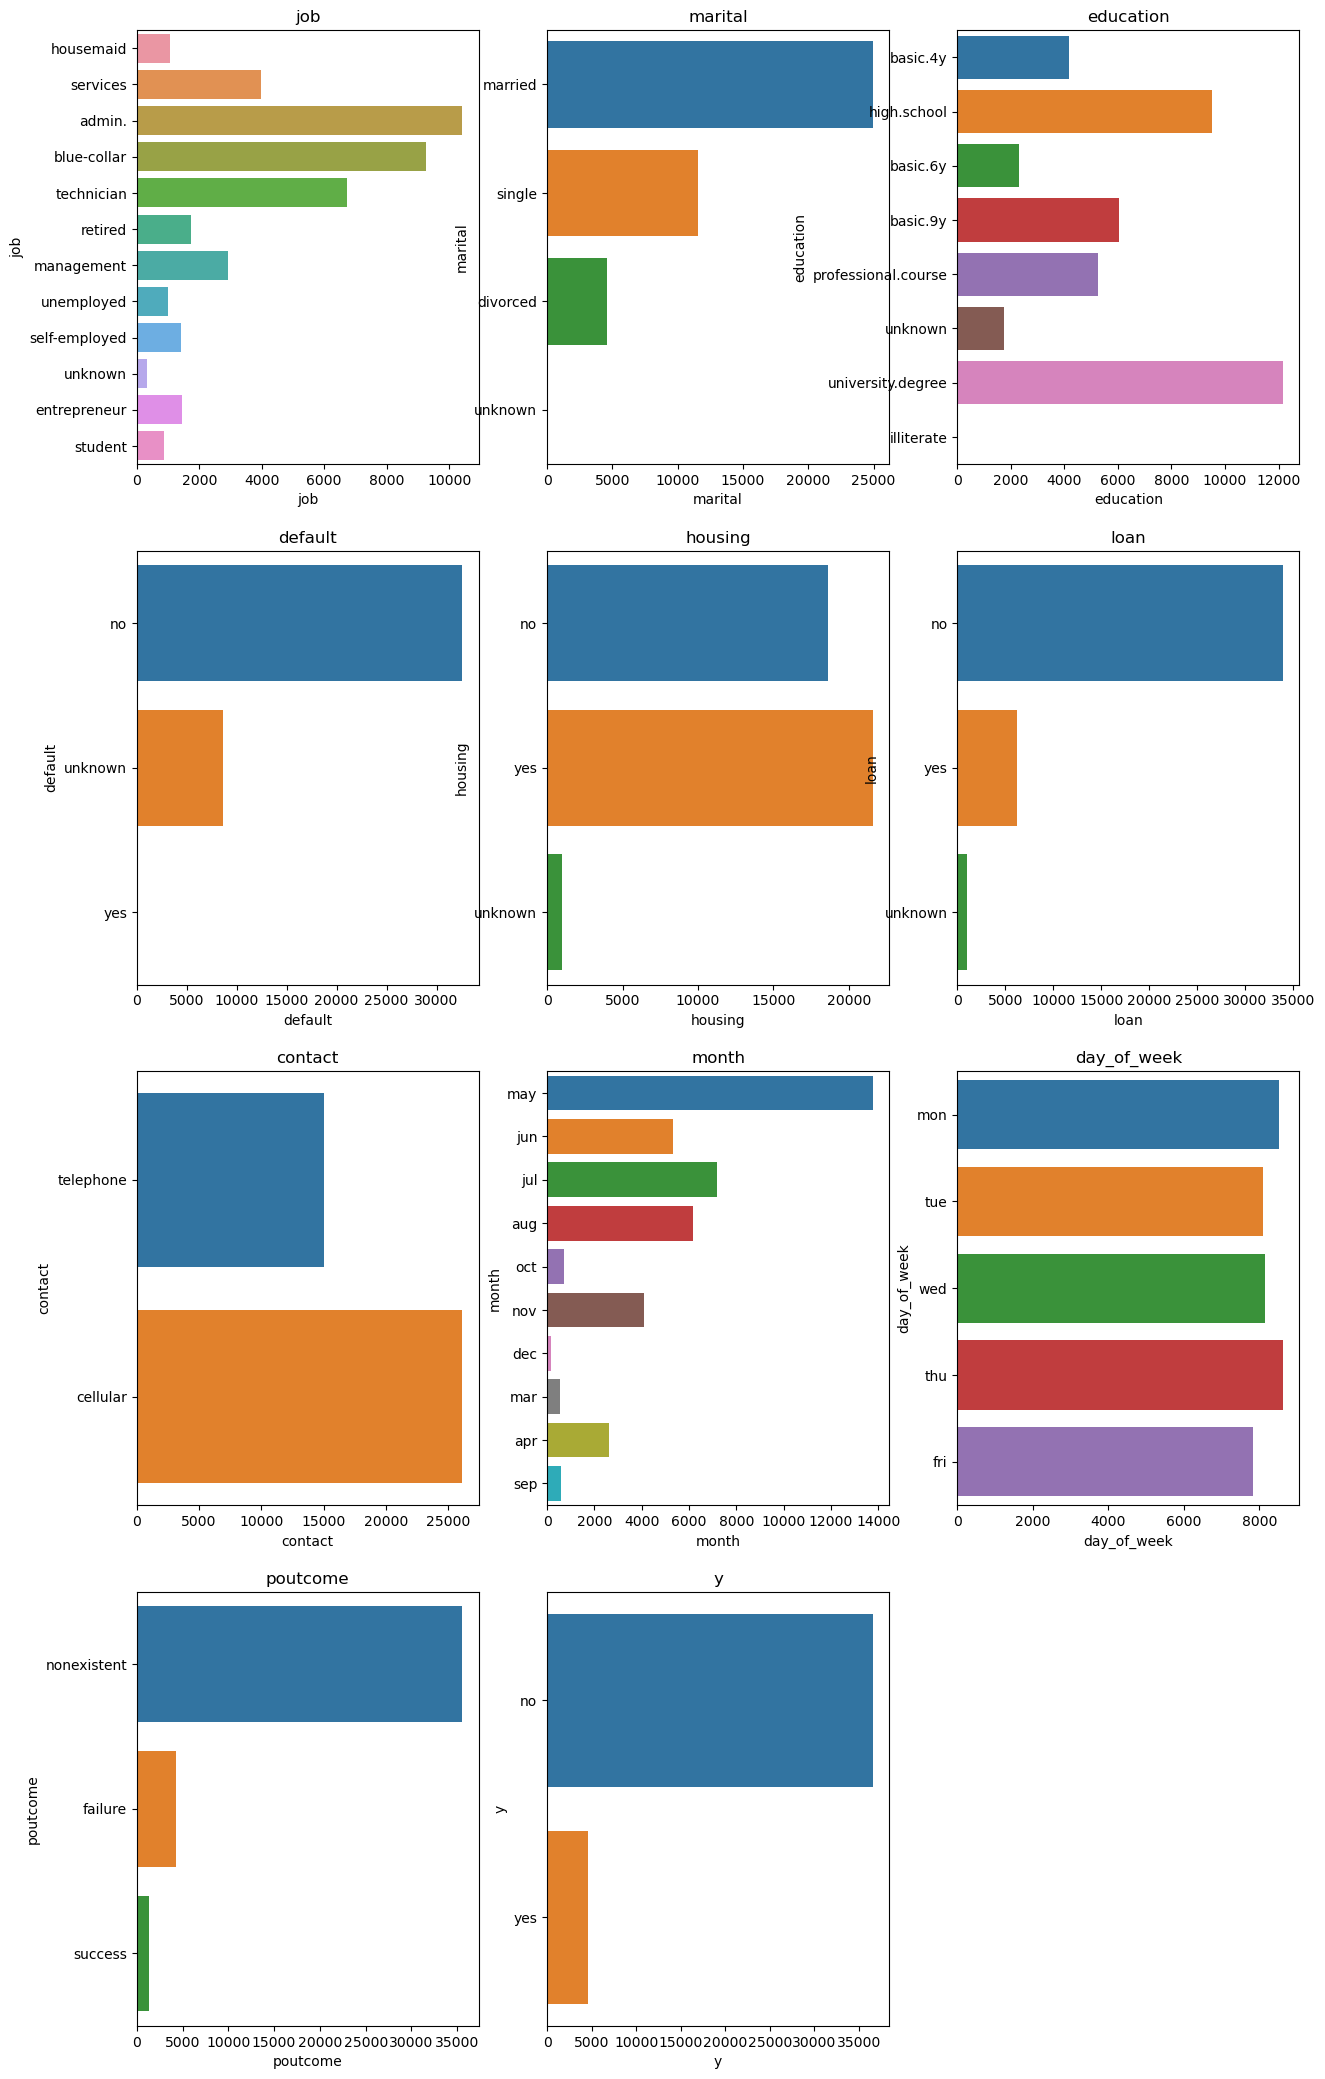

In [12]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

**Take-away**:
- client with job type as management records are high in given dataset and housemaid are very less
- client who married are high in records in given dataset and divorced are less
- client whoes education background is secondary are in high numbers in given dataset
- defualt feature seems to be does not play important role as it has value of no at high ratio to value yes which can drop
- data in month of may is high and less in dec

**6. Relationship between Categorical Features and Label**

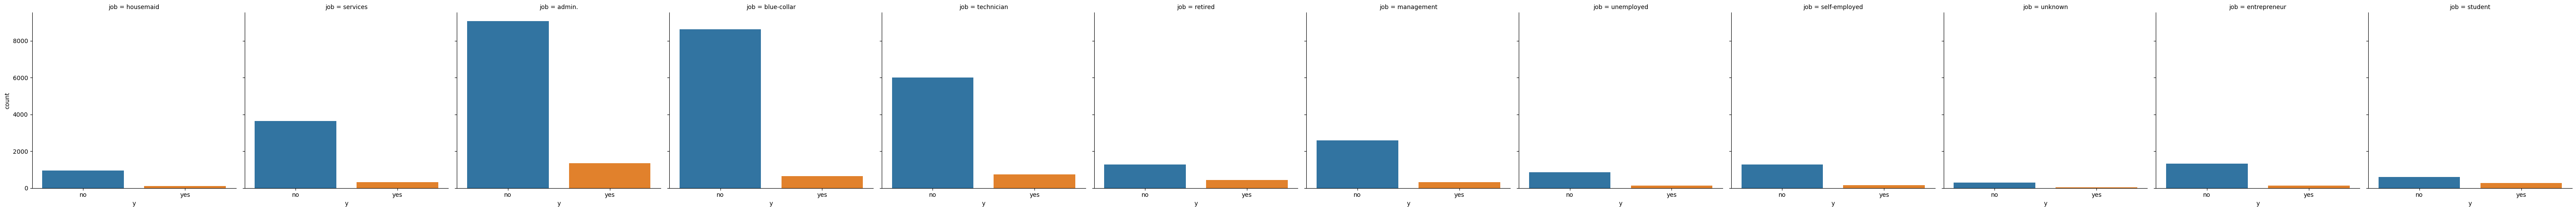

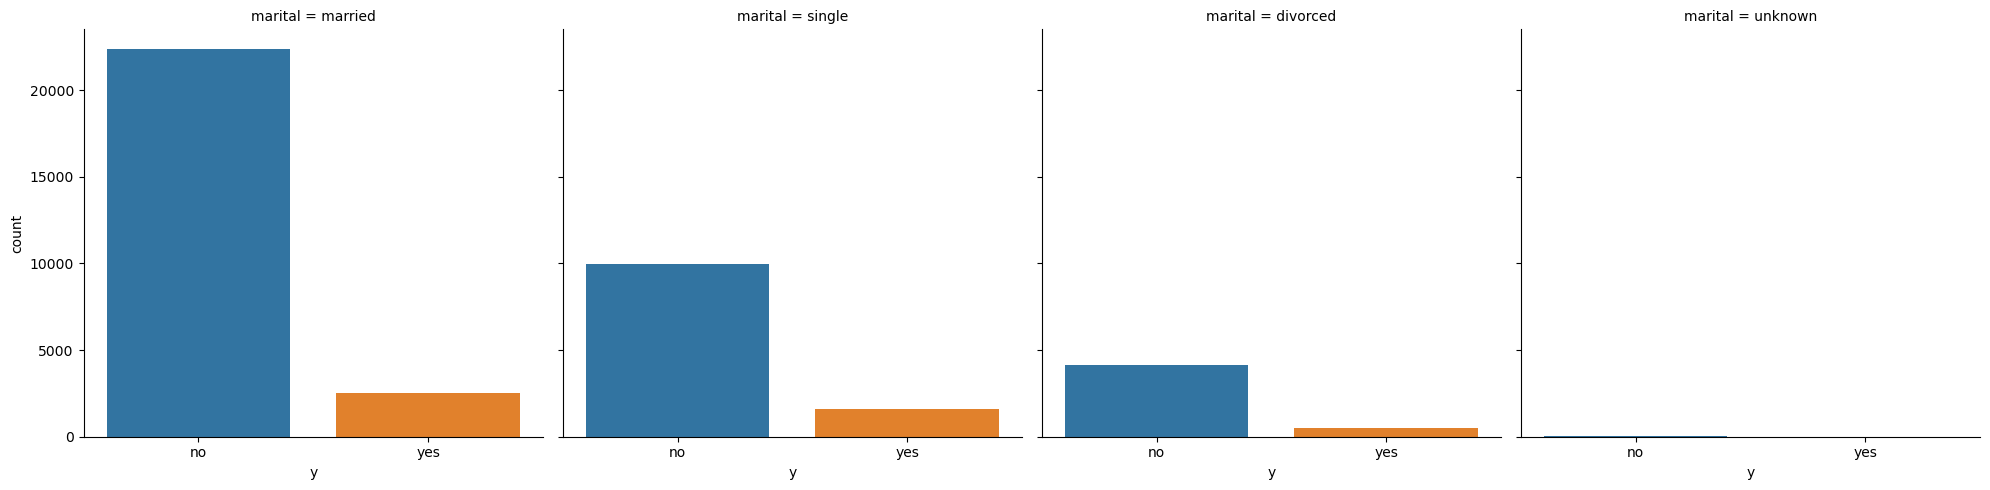

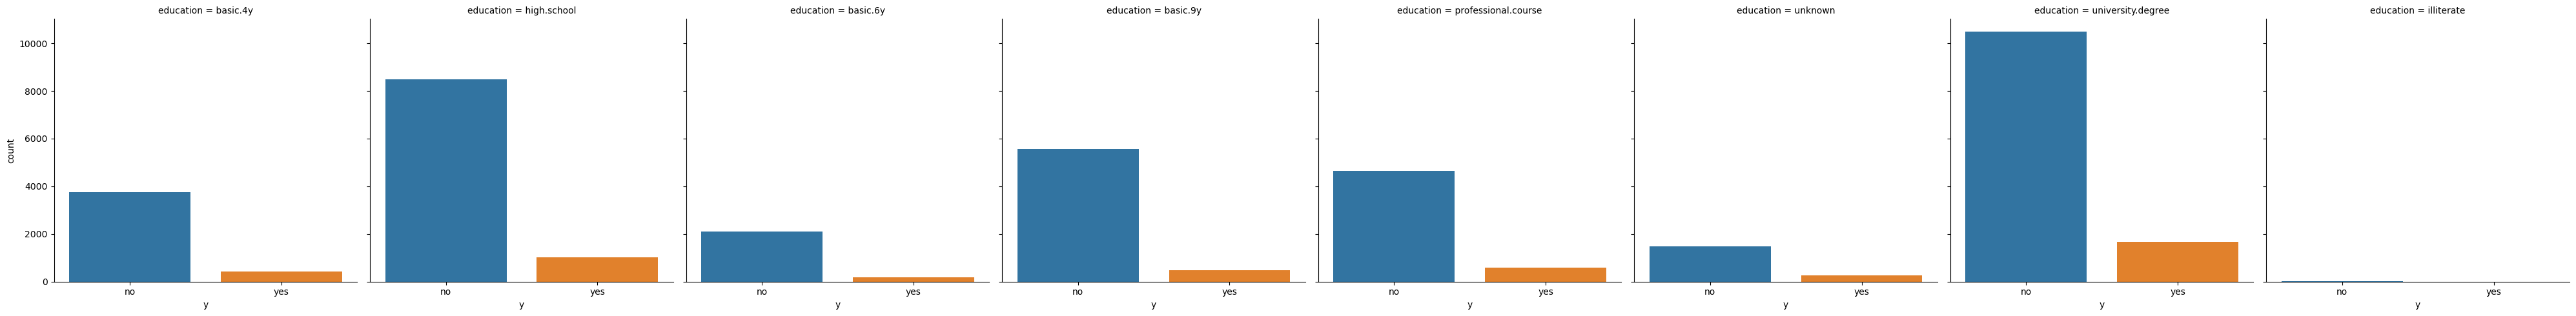

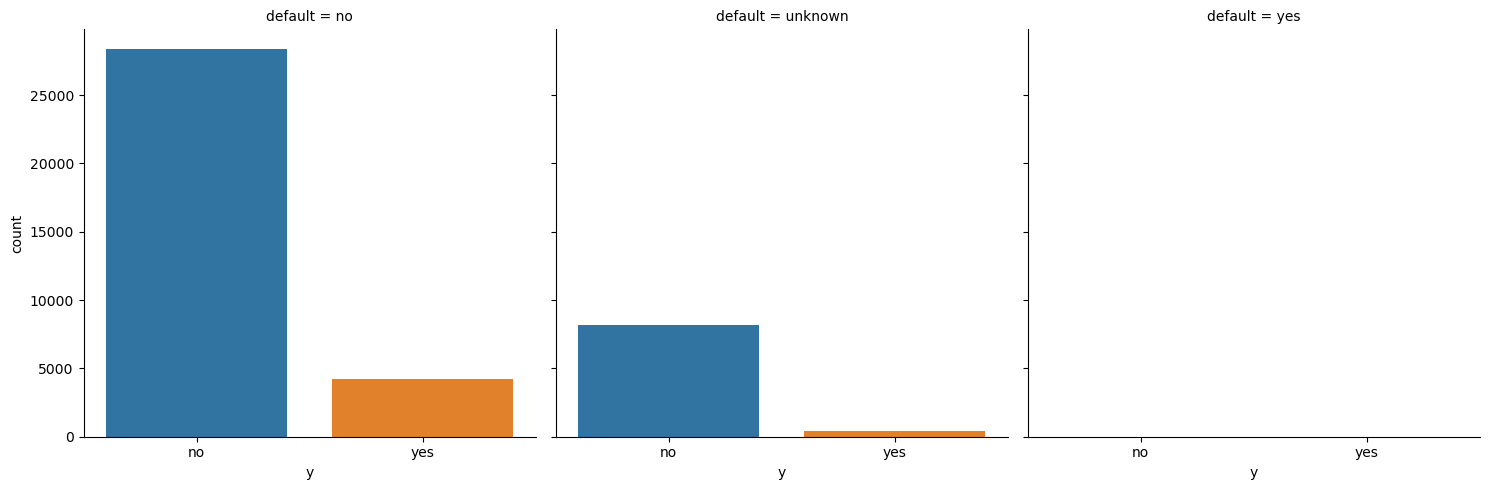

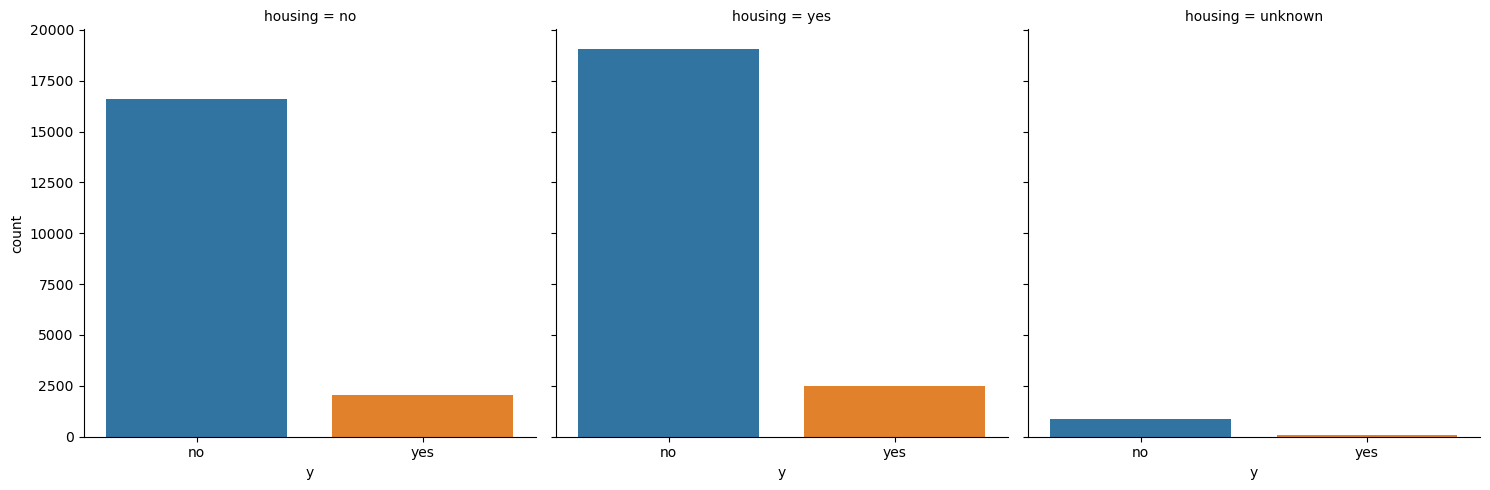

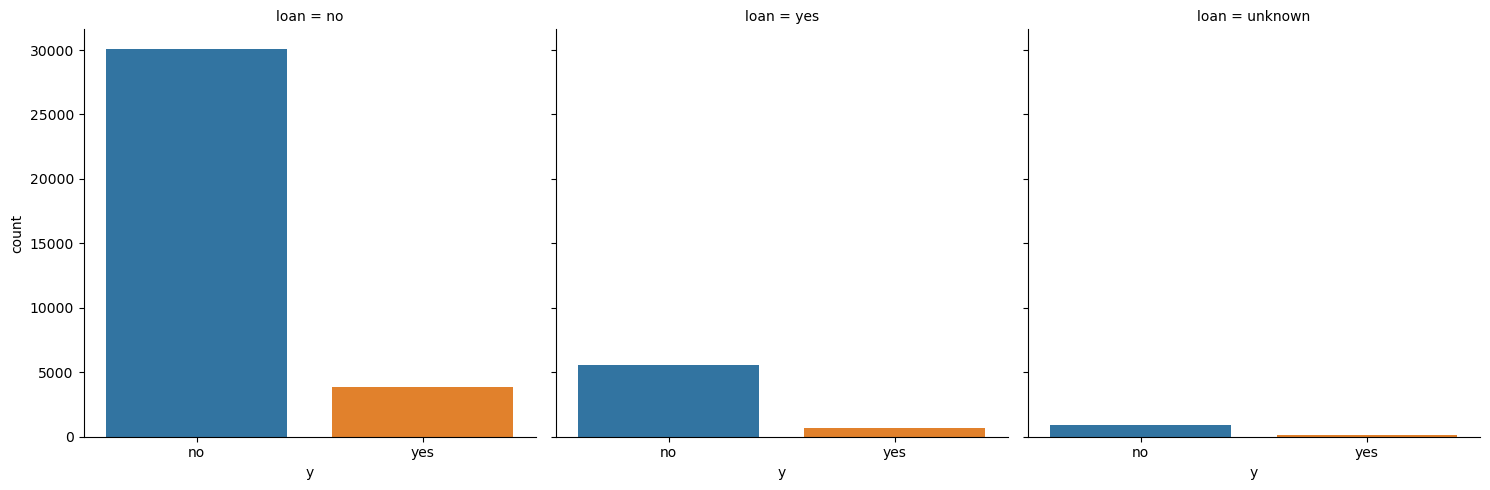

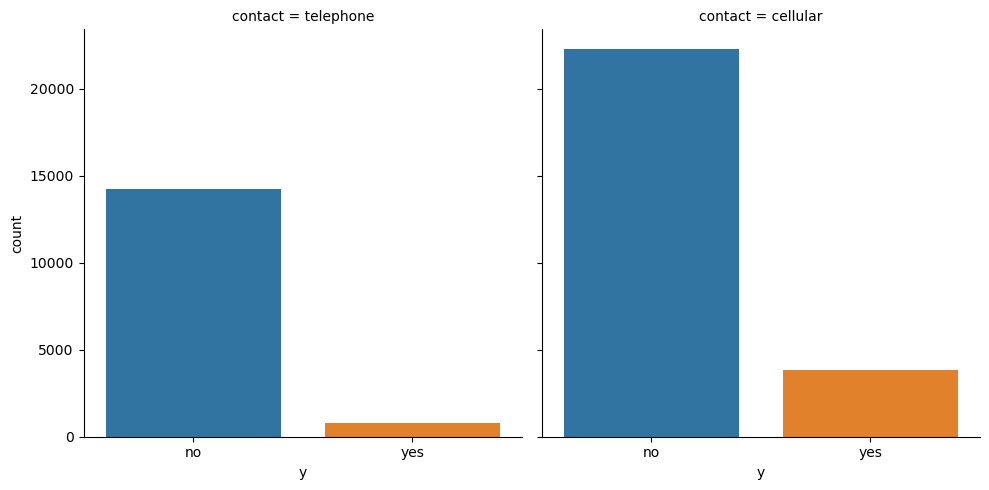

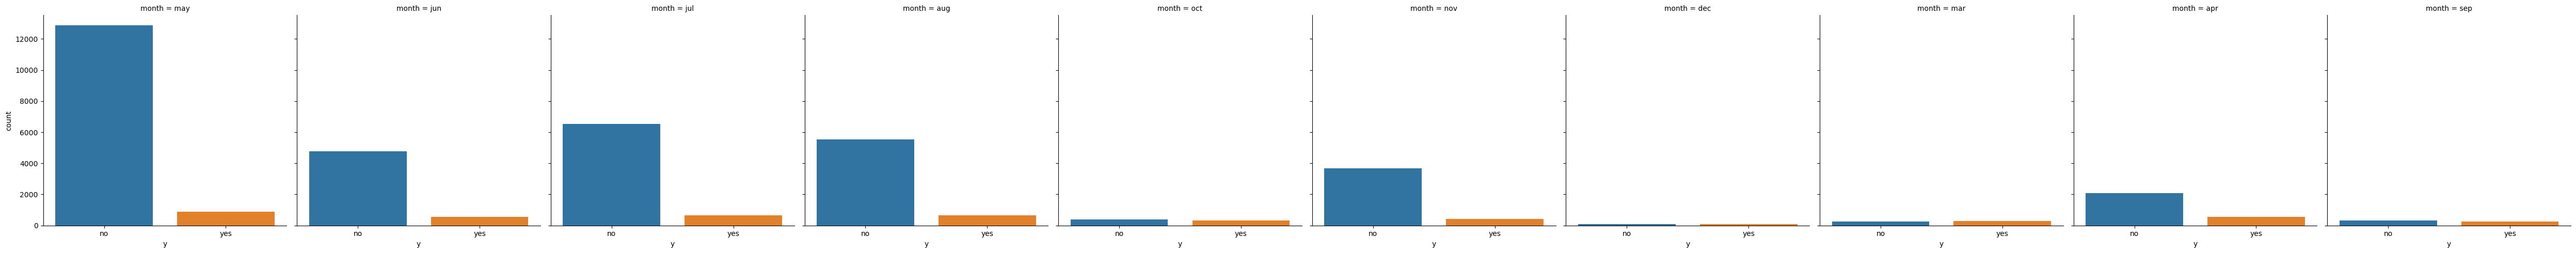

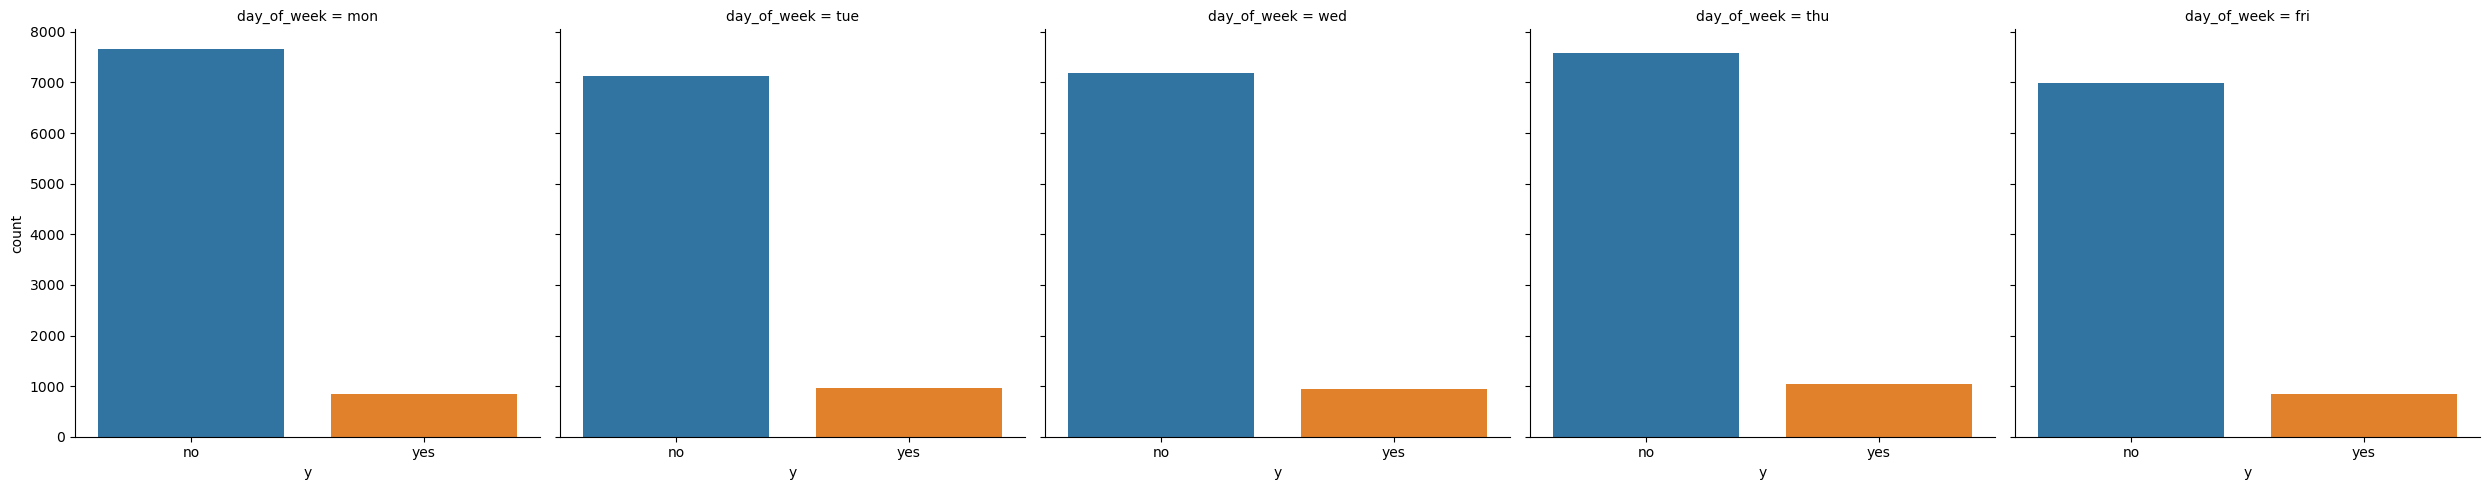

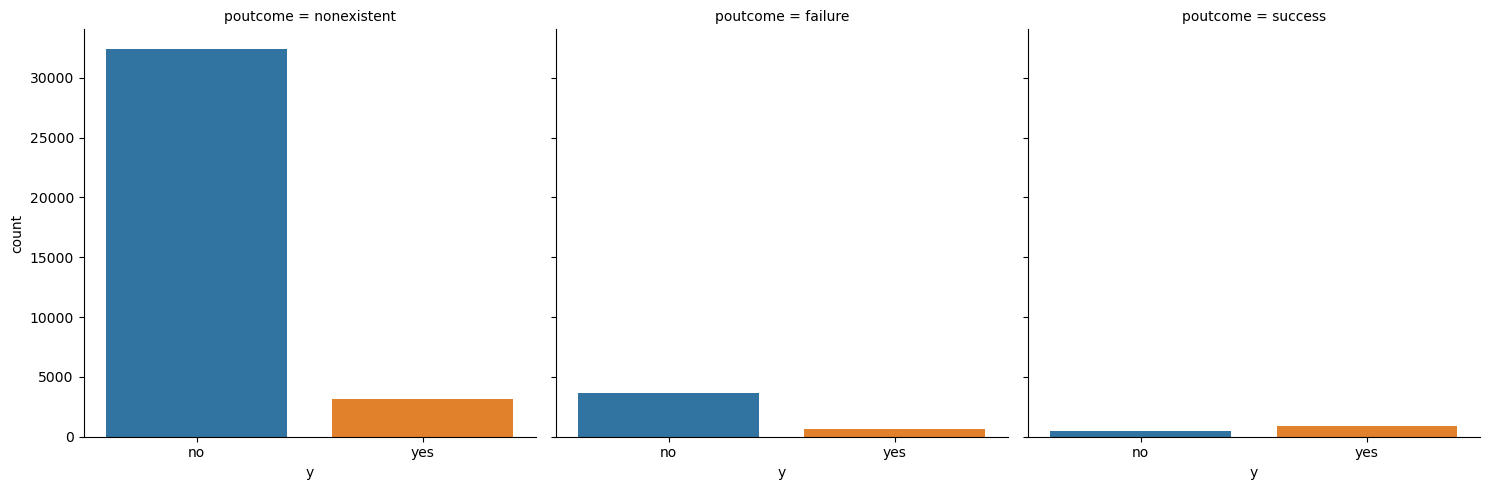

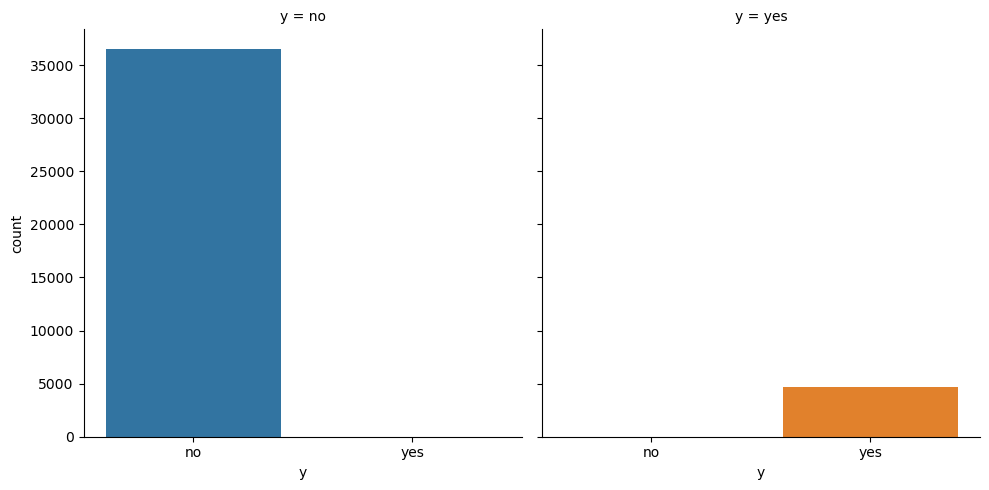

In [13]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

In [14]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

**Take-away**:
- retired client has high interest on deposit
- client who has housing loan seems to be not interested much on deposit
- if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
- in month of March, September, October and December, client show high interest to deposit
- in month of may, records are high but client interst ratio is very less

**7. Explore the Numerical Features**

In [15]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


**Take-away**:
- there are 7 numerical features

**8. Find Discrete Numerical Features**

In [24]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)

Discrete Variables Count: 3
['previous', 'emp.var.rate', 'nr.employed']


**Take-away**:
- there are 3 Discrete Variables in give dataset

**9. Relation between Discrete numerical Features and Labels**


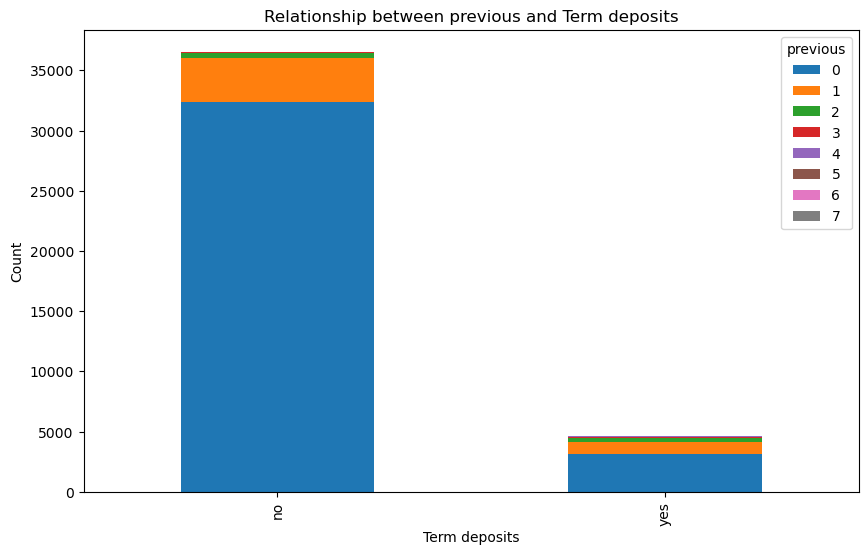

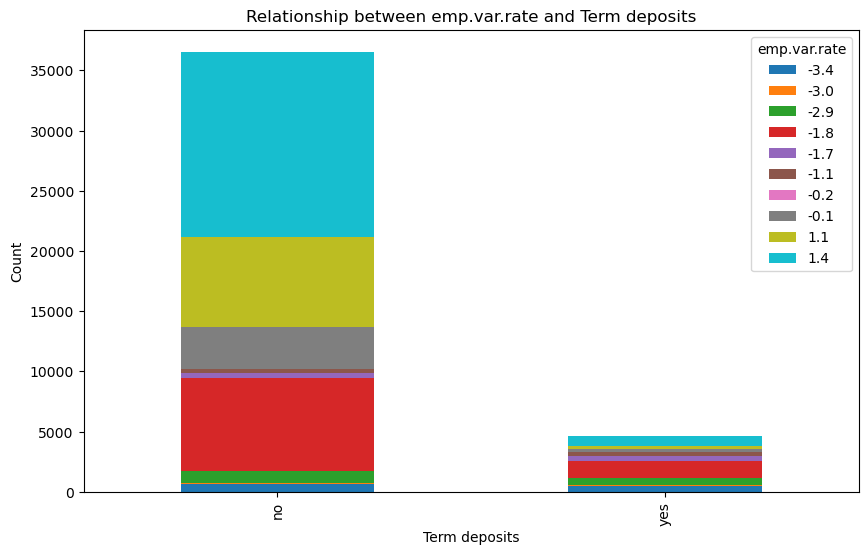

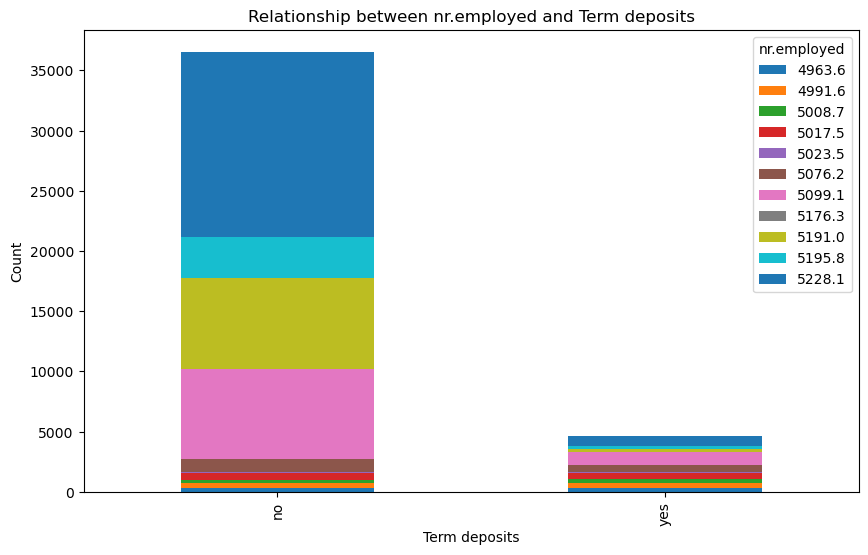

In [27]:
# Visualize the relationship using a grouped bar chart
for feature in discrete_feature:
    grouped_data = df.groupby(['y', feature]).size().unstack()
    grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.xlabel('Term deposits')
    plt.ylabel('Count')
    plt.title('Relationship between '+feature+ ' and Term deposits')
    plt.show()


**10. Find Continous Numerical Features**

In [17]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


**Take-away**:
- there are 7 continuous numerical features

**11. Distribution of Continous Numerical Features**

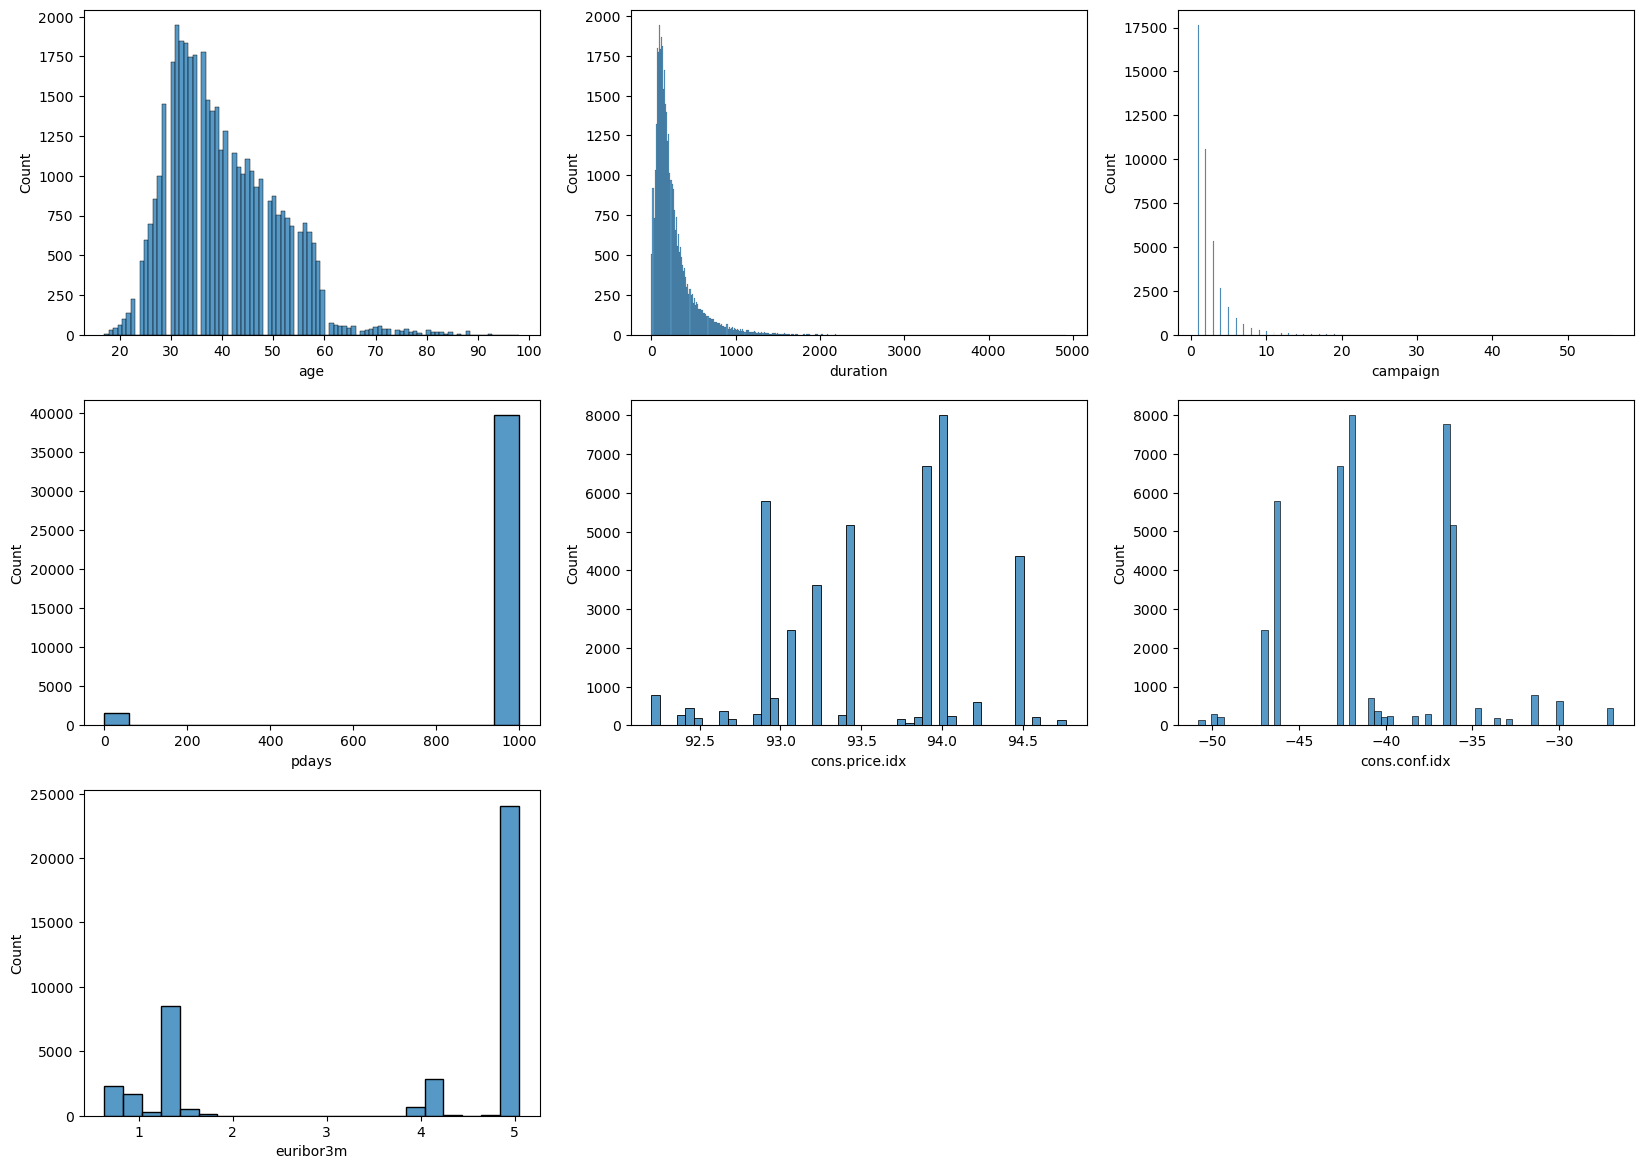

In [18]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**Take-away**: 
- it seems age, days distributed normally
- balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

**12. Relation between Continous numerical Features and Labels**

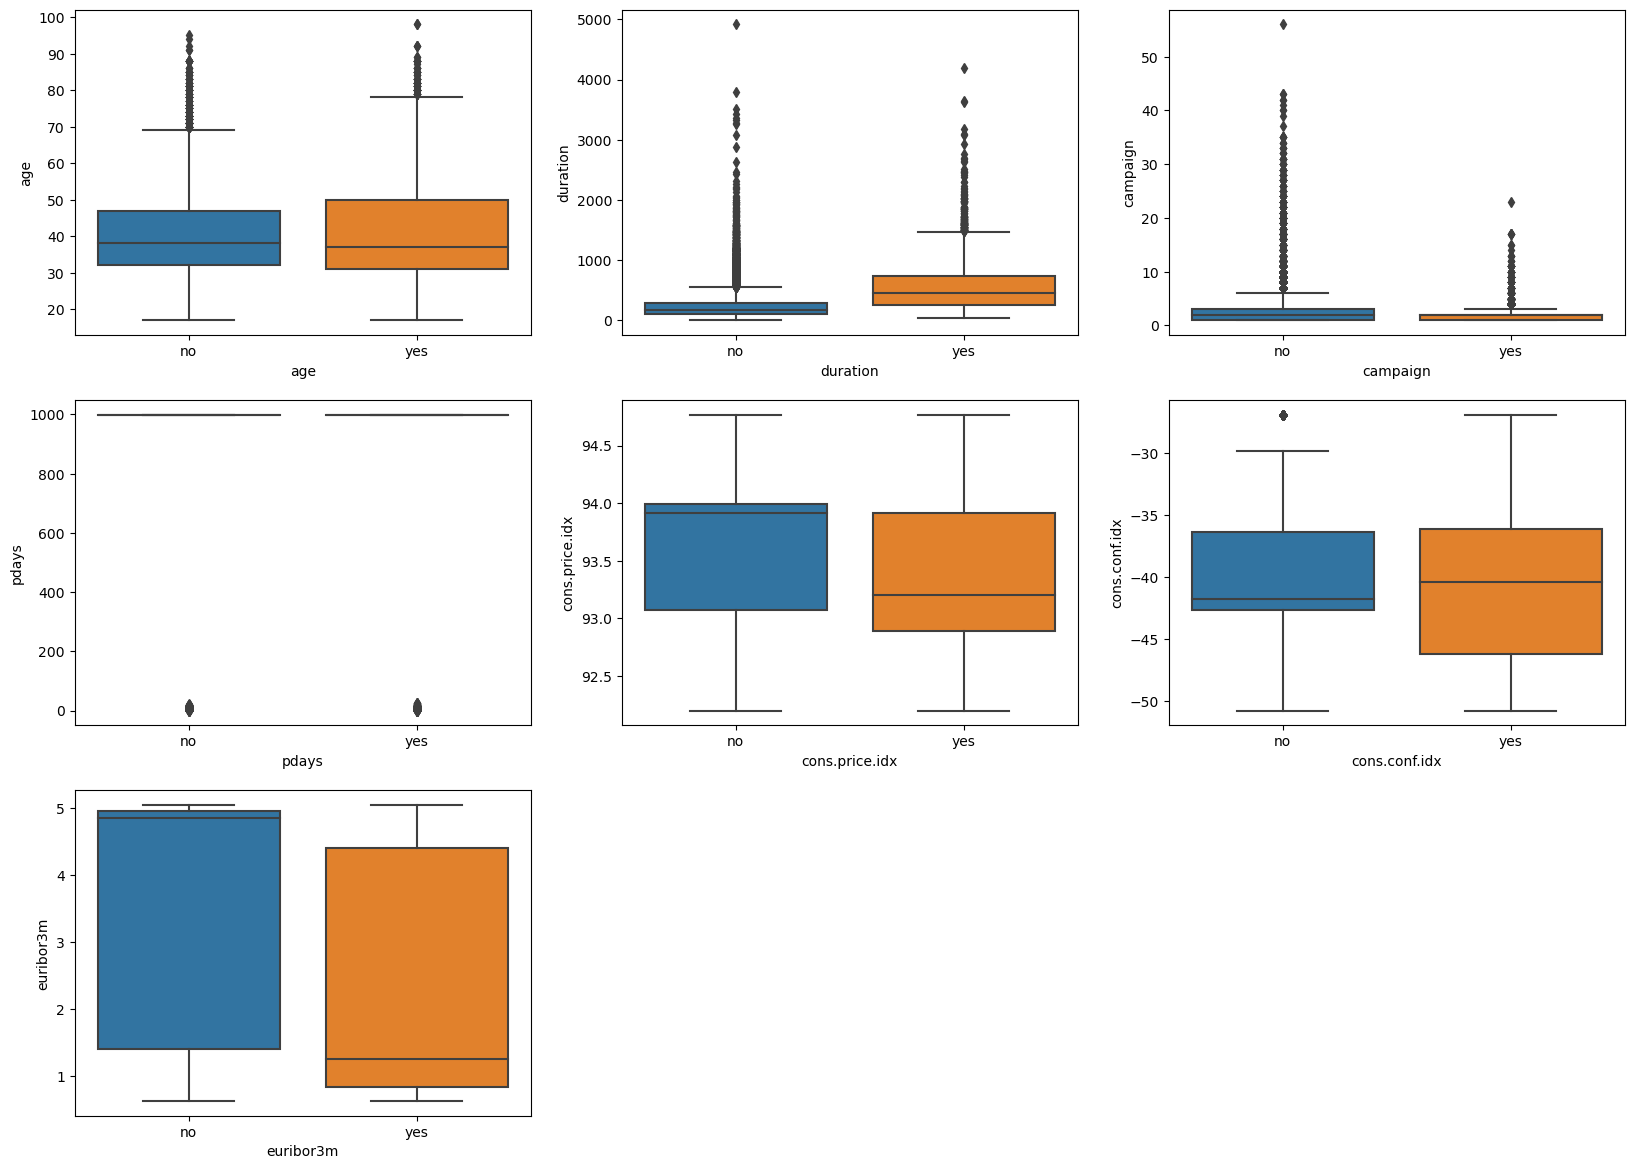

In [19]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

**Take-away**:
- client shows interest on deposit who had discussion for longer duration

**13. Find Outliers in numerical features**

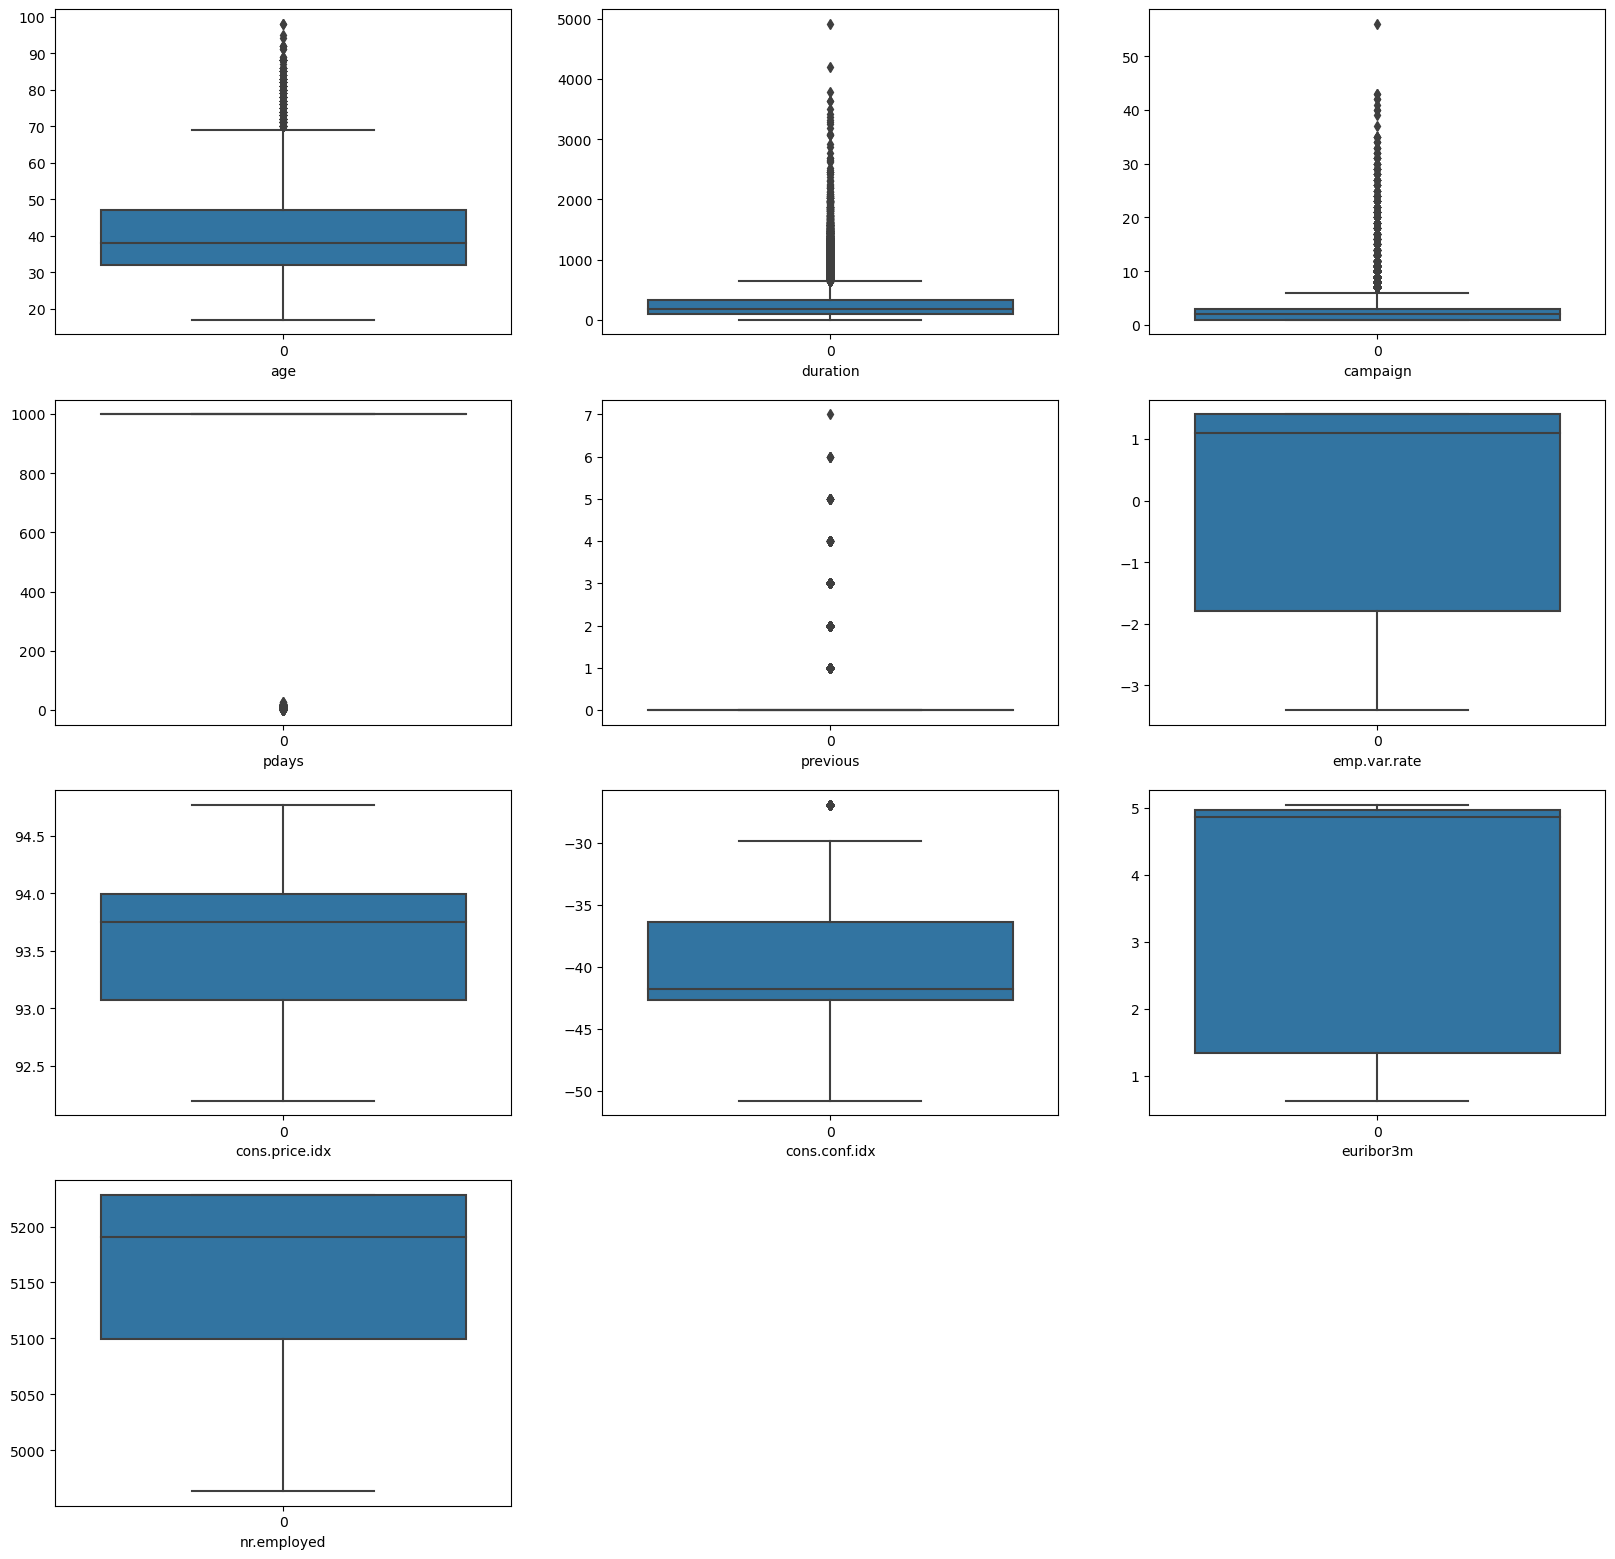

In [20]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

**Take-away**:
- age, balance, duration, compaign, pdays and previous has some outliers

**14. Explore the Correlation between numerical features**

<Axes: >

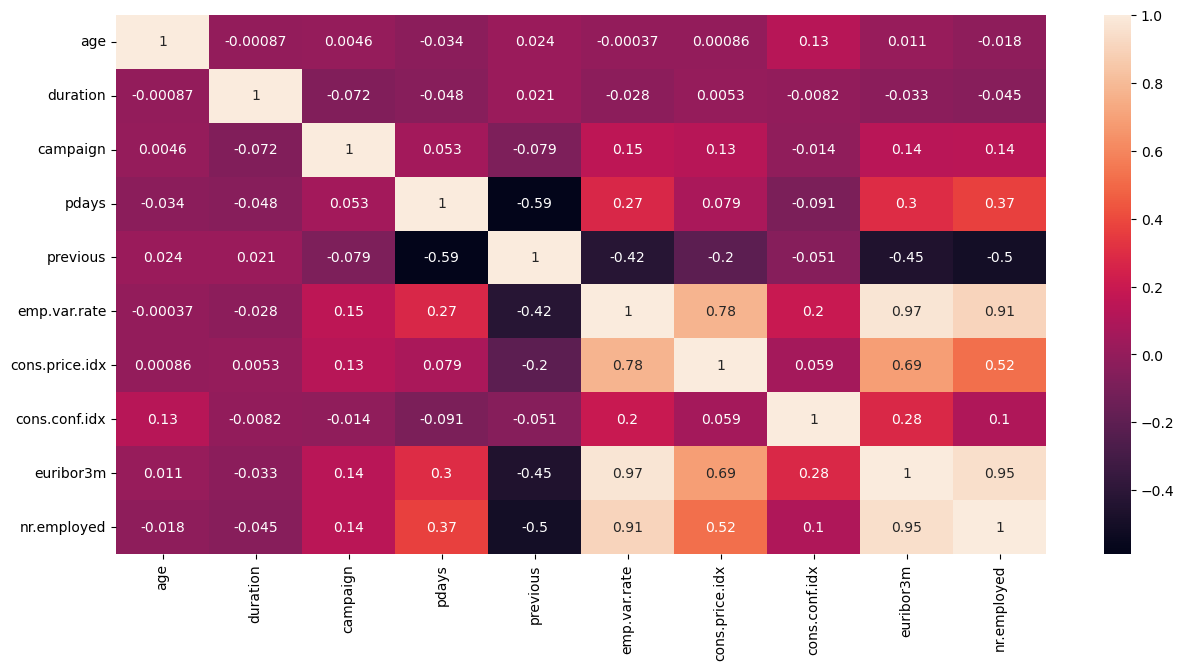

In [21]:
## Checking for correlation
cor_mat=df.corr(numeric_only=True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

**Take-away**: 
- it seems no feature is heavily correlated with other features

**15. Check the Data set is balanced or not based on target values in classification**

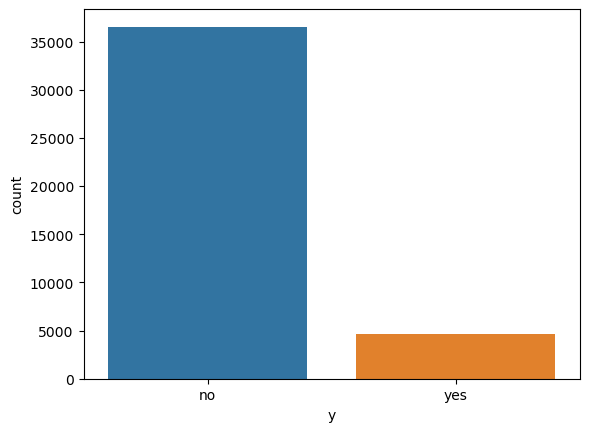

In [22]:
#total patient count based on cardio_results
sns.countplot(x='y',data=df)
plt.show()

In [23]:
df['y'].groupby(df['y']).count()

y
no     36548
yes     4640
Name: y, dtype: int64

**Take-away**: 
- given dataset seems to be balanced. 

# Feature Engineering

- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features
- Handle Feature Scalling
- Remove Outliers

As per Exploratory Data Analysis EDA, 
- no missing value found
- no feature found with one value
- 9 categorical features
- defaut features does not play imp role
- it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

In [24]:
df2=df.copy()

In [25]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
df2.shape

(41188, 21)

In [27]:
#defaut features does not play imp role
df2.groupby(['y','default']).size()

y    default
no   no         28391
     unknown     8154
     yes            3
yes  no          4197
     unknown      443
dtype: int64

In [28]:
df2.drop(['default'],axis=1, inplace=True)

In [29]:
df2.groupby(['y','pdays']).size()

y    pdays
no   0            5
     1           18
     2           24
     3          141
     4           55
     5           17
     6          123
     7           20
     8            6
     9           29
     10          22
     11          13
     12          32
     13           8
     14           9
     15           8
     16           5
     17           6
     18           3
     19           2
     20           1
     22           1
     999      36000
yes  0           10
     1            8
     2           37
     3          298
     4           63
     5           29
     6          289
     7           40
     8           12
     9           35
     10          30
     11          15
     12          26
     13          28
     14          11
     15          16
     16           6
     17           2
     18           4
     19           1
     21           2
     22           2
     25           1
     26           1
     27           1
     999       3673
dtype: in

In [30]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['pdays'],axis=1, inplace=True)

In [31]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: age, Length: 78, dtype: int64

In [32]:
# remove outliers in feature duration...
df2.groupby(['y','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

y    duration
no   0            4
     1            3
     2            1
     3            3
     4           12
                 ..
yes  3094         1
     3183         1
     3631         1
     3643         1
     4199         1
Name: duration, Length: 2562, dtype: int64

In [33]:
# remove outliers in feature campaign...
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           15342
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
     33              4
     34              3
     35              5
     37              1
     39              1
     40              2
     41              1
     42              2
     43              2
     56              1
yes  1            23

In [34]:
df3 = df2[df2['campaign'] < 33]

In [35]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           15342
     2            9359
     3            4767
     4            2402
     5            1479
     6             904
     7             591
     8             383
     9             266
     10            213
     11            165
     12            122
     13             88
     14             68
     15             49
     16             51
     17             54
     18             33
     19             26
     20             30
     21             24
     22             17
     23             15
     24             15
     25              8
     26              8
     27             11
     28              8
     29             10
     30              7
     31              7
     32              4
yes  1            2300
     2            1211
     3             574
     4             249
     5             120
     6              75
     7              38
     8              17
     9              17
     10             12
     11             

In [36]:
# remove outliers in feature previous...
df3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           32400
     1            3594
     2             404
     3              88
     4              32
     5               5
     6               2
     7               1
yes  0            3141
     1             967
     2             350
     3             128
     4              38
     5              13
     6               3
Name: previous, dtype: int64

In [37]:
df4 = df3[df3['previous'] < 31]

In [38]:
cat_columns = ['job', 'day_of_week', 'marital', 'education', 'contact', 'month', 'poutcome', 'housing', 'loan',]
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [39]:
bool_columns = ['y']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [40]:
df4.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,housing_unknown,housing_yes,loan_unknown,loan_yes,y_new
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,1,0,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


# Split Dataset into Training set and Test set

In [41]:
X = df4.drop(['y_new'],axis=1)
y = df4['y_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [42]:
len(X_train)

32932

In [43]:
len(X_test)

8234

# Model Selection

In [44]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.91786853 0.90921512 0.90965685 0.91071971 0.91071971]
0.9116359828834006


In [47]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.91361773 0.91301048 0.91071971 0.91269359 0.90965685]
0.9119396711750054


In [48]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['sqrt', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [49]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [50]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.856701389613138,
  'best_params': {'criterion': 'entropy',
   'max_depth': 2,
   'max_features': 'log2',
   'n_estimators': 100}},
 {'model': 'XGBClassifier',
  'best_score': 0.8872856237926594,
  'best_params': {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}}]

# Model Building

In [51]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [52]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
model_xgb.score(X_test,y_test)

0.9172941462229779

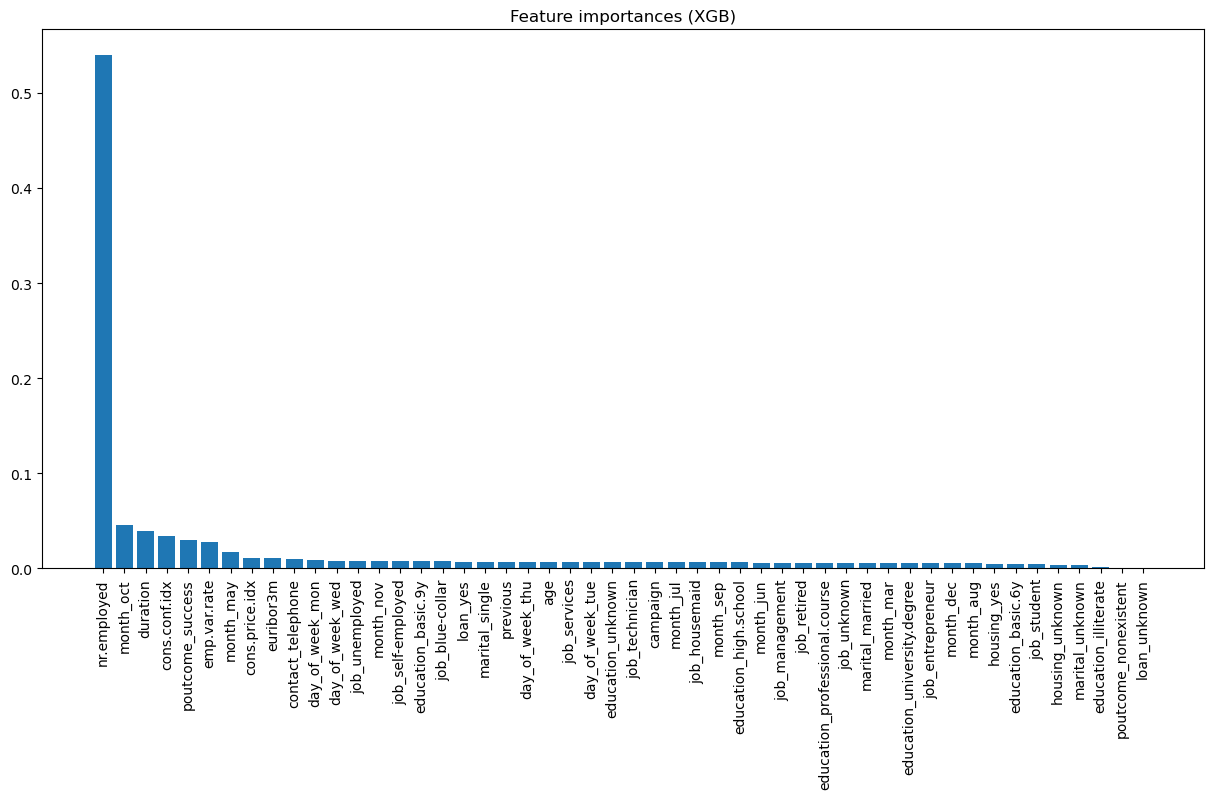

In [54]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [55]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[7065,  280],
       [ 401,  488]], dtype=int64)

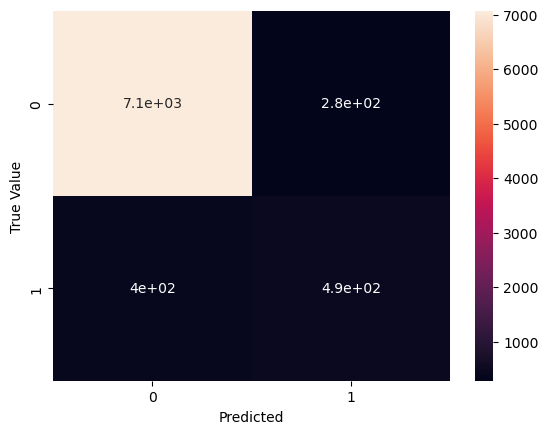

In [56]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [57]:
# Predict probabilities
probs = model_xgb.predict_proba(X)[:, 1]

# Create a DataFrame with probabilities and original data
data_with_probs = X.copy()
data_with_probs['probability'] = probs

# Sort by probability in descending order
sorted_data = data_with_probs.sort_values(by='probability', ascending=False)

# Calculate the number of samples to select (15% of the dataset)
total_samples = len(sorted_data)
percentile_to_select = 0.15
num_samples_to_select = int(total_samples * percentile_to_select)

# Select the top 15% of the dataset
selected_data = sorted_data.head(num_samples_to_select)


selected_data


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,housing_unknown,housing_yes,loan_unknown,loan_yes,probability
40556,69,840,1,2,-1.1,94.199,-37.5,0.886,4963.6,0,...,0,0,1,0,1,0,1,0,1,0.996174
40855,41,845,1,3,-1.1,94.199,-37.5,0.886,4963.6,0,...,0,0,1,0,1,0,0,0,0,0.995811
39868,56,910,1,2,-1.7,94.055,-39.8,0.723,4991.6,0,...,0,0,0,0,1,0,1,0,0,0.993247
40589,47,362,1,2,-1.1,94.199,-37.5,0.884,4963.6,0,...,0,0,1,0,1,0,0,0,0,0.992132
39854,59,614,1,2,-1.7,94.055,-39.8,0.720,4991.6,0,...,0,0,0,0,1,0,1,0,0,0.991933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28625,36,353,2,0,-1.8,93.075,-47.1,1.415,5099.1,0,...,0,0,0,1,0,0,0,0,0,0.287053
36996,47,320,2,0,-2.9,92.469,-33.6,1.059,5076.2,0,...,0,0,0,1,0,0,0,0,0,0.287019
37946,83,369,1,0,-3.4,92.379,-29.8,0.803,5017.5,0,...,0,0,1,1,0,0,1,0,0,0.286983
29626,23,637,1,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0,0,0,1,0,0,1,0,0,0.286925
